In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


import os
os.getcwd()
# Any results you write to the current directory are saved as output.

'C:\\Users\\100731865'

In [2]:

df = pd.read_csv("C:/Users/100731865/census_mutations_gdc_score.csv")
df.index = df[df.columns[0]]
df = df.drop(columns = df.columns[0], axis = 1)

In [3]:
ids = df.case_id
labels = df.cancer
df = df.drop(columns= [df.columns[0], df.columns[1]], axis = 1)
df.head()

,ABI1,ABL1,ABL2,ACKR3,ACSL3,ACVR1,ACVR2A,AFF1,AFF3,AFF4,...,XPO1,YWHAE,ZBTB16,ZFHX3,ZNF198,ZNF278,ZNF331,ZNF384,ZNF521,ZRSR2
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels_num = [0] * df.shape[0]

labels_dict = {}

un = np.unique(labels,return_counts=True)
i = 0
for label in un[0]:
    labels_num = np.where(np.array(labels) == label, i, labels_num)
    labels_dict[label] = un[1][i]
    i = i + 1

    



In [32]:
cancer_dict = {np.unique(labels)[0] : "Adrenocortical carcinoma",
               np.unique(labels)[1] : "Bladder Urothelial Carcinoma",
               np.unique(labels)[2] : "Breast invasive carcinoma",
               np.unique(labels)[3] : "Cervical SCC and endocervical adenocarcinoma",
               np.unique(labels)[4] : "Cholangiocarcinoma",
               np.unique(labels)[5] : "Colon adenocarcinoma",
               np.unique(labels)[6] : "Lymphoid Neoplasm Diffuse Large B-cell Lymphoma",
               np.unique(labels)[7] : "Esophageal carcinoma",
               np.unique(labels)[8] : "Glioblastoma multiforme",
               np.unique(labels)[9] : "Head and Neck squamous cell carcinoma",
               np.unique(labels)[10] : "Kidney Chromophobe",
               np.unique(labels)[11] : "Kidney renal clear cell carcinoma",
               np.unique(labels)[12] : "Kidney renal papillary cell carcinoma",
               np.unique(labels)[13] : "Acute Myeloid Leukemia",
               np.unique(labels)[14] : "Brain Lower Grade Glioma",
               np.unique(labels)[15] : "Liver hepatocellular carcinoma",
               np.unique(labels)[16] : "Lung adenocarcinoma",
               np.unique(labels)[17] : "Lung squamous cell carcinoma",
               np.unique(labels)[18] : "Mesothelioma",
               np.unique(labels)[19] : "Ovarian serous cystadenocarcinoma",
               np.unique(labels)[20] : "Pancreatic adenocarcinoma",
               np.unique(labels)[21] : "Pheochromocytoma and Paraganglioma",
               np.unique(labels)[22] : "Prostate adenocarcinoma",
               np.unique(labels)[23] : "Rectum adenocarcinoma",
               np.unique(labels)[24] : "Sarcoma",
               np.unique(labels)[25] : "Skin Cutaneous Melanoma",
               np.unique(labels)[26] : "Stomach adenocarcinoma",
               np.unique(labels)[27] : "Testicular Germ Cell Tumors",
               np.unique(labels)[28] : "Thyroid carcinoma",
               np.unique(labels)[29] : "Thymoma",
               np.unique(labels)[30] : "Uterine Corpus Endometrial Carcinoma",
               np.unique(labels)[31] : "Uterine Carcinosarcoma",
               np.unique(labels)[32] : "Uveal Melanoma"
    
}

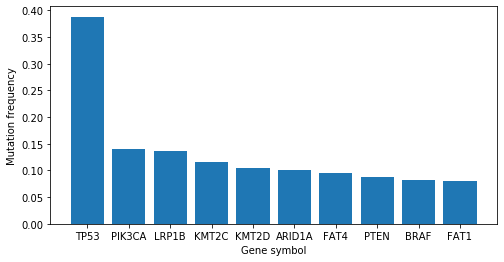

In [6]:
freq = pd.DataFrame(df.sum()/df.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:10]

from pylab import rcParams
rcParams['figure.figsize'] = 8, 4

plt.bar(top_10.index , height = top_10[0])
plt.ylabel("Mutation frequency")
plt.xlabel("Gene symbol")
plt.savefig('barchart.png')


In [ ]:
from chart_studio.plotly import iplot
import plotly.graph_objs as go
import plotly.express as px
import plotly
from sklearn.manifold import TSNE

model = TSNE(learning_rate= 100, n_components=3, n_iter=1000, perplexity = 100, n_iter_without_progress = 250)
tsne_features = model.fit_transform(df)

tsne_3d = pd.DataFrame(tsne_features)
tsne_3d.columns = ["one", "two", "three"]
tsne["label"] = labels.reset_index(drop=True)


fig = px.scatter_3d(tsne_3d, x='one', y='two', z='three', color = "label", opacity=0.5)
fig.show()

## creating the training and test data

In [8]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(np.array(df), labels_num, test_size =0.2, random_state = 3)

y_train_d = pd.get_dummies(y_train)

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_train.shape

(8667, 536)

## KNN
## Cosine distance

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

model_knn = KNeighborsClassifier(n_neighbors=10, metric="cosine")
model_knn.fit(x_train,y_train)

preds_knn = model_knn.predict(x_test)
print(classification_report(y_test, preds_knn))

C:\Users\100731865\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


              precision    recall  f1-score   support

           0       0.16      0.26      0.20        19
           1       0.50      0.19      0.27        75
           2       0.25      0.63      0.36       217
           3       0.29      0.08      0.12        50
           4       0.20      0.12      0.15         8
           5       0.53      0.47      0.50        86
           6       0.67      0.22      0.33         9
           7       0.16      0.11      0.13        38
           8       0.40      0.35      0.38       102
           9       0.28      0.35      0.31       105
          10       0.00      0.00      0.00        12
          11       0.67      0.54      0.60        74
          12       0.31      0.20      0.24        55
          13       0.50      0.23      0.31        31
          14       0.56      0.78      0.66       101
          15       0.10      0.06      0.08        77
          16       0.53      0.28      0.36       127
          17       0.09    

## Decision Tree

In [10]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
clf_preds = clf.predict(x_test)

print(classification_report(y_test, clf_preds))

              precision    recall  f1-score   support

           0       0.09      0.16      0.12        19
           1       0.18      0.13      0.15        75
           2       0.34      0.43      0.38       217
           3       0.20      0.24      0.22        50
           4       0.12      0.25      0.16         8
           5       0.37      0.34      0.35        86
           6       0.50      0.22      0.31         9
           7       0.19      0.13      0.16        38
           8       0.31      0.29      0.30       102
           9       0.31      0.32      0.32       105
          10       0.05      0.17      0.08        12
          11       0.67      0.59      0.63        74
          12       0.19      0.20      0.20        55
          13       0.28      0.26      0.27        31
          14       0.65      0.69      0.67       101
          15       0.23      0.23      0.23        77
          16       0.47      0.36      0.41       127
          17       0.41    

## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(x_train, y_train);

rf_preds = rf.predict(x_test)
print(classification_report(y_test, rf_preds))

C:\Users\100731865\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


              precision    recall  f1-score   support

           0       0.13      0.16      0.14        19
           1       0.46      0.23      0.30        75
           2       0.39      0.54      0.46       217
           3       0.18      0.12      0.14        50
           4       0.00      0.00      0.00         8
           5       0.51      0.56      0.53        86
           6       0.25      0.11      0.15         9
           7       0.25      0.13      0.17        38
           8       0.42      0.35      0.38       102
           9       0.38      0.44      0.41       105
          10       0.06      0.17      0.09        12
          11       0.68      0.64      0.66        74
          12       0.25      0.22      0.23        55
          13       0.28      0.32      0.30        31
          14       0.64      0.76      0.69       101
          15       0.29      0.17      0.21        77
          16       0.58      0.48      0.53       127
          17       0.52    

## ANN

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(400, input_shape = (x_train.shape[1],), activation = 'relu'))
model.add(Dense(300, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(33, activation = 'softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train_d, validation_split=0.1, epochs=5, batch_size=20, shuffle=True)

Train on 7800 samples, validate on 867 samples
Epoch 1/5
7800/7800 [==============================] - 2s 239us/sample - loss: 2.6060 - accuracy: 0.2824 - val_loss: 2.1947 - val_accuracy: 0.3933
Epoch 2/5
7800/7800 [==============================] - 1s 191us/sample - loss: 1.8423 - accuracy: 0.4708 - val_loss: 2.0871 - val_accuracy: 0.4083
Epoch 3/5
7800/7800 [==============================] - 1s 187us/sample - loss: 1.4586 - accuracy: 0.5705 - val_loss: 2.2073 - val_accuracy: 0.3945
Epoch 4/5
7800/7800 [==============================] - 1s 192us/sample - loss: 1.1235 - accuracy: 0.6627 - val_loss: 2.3427 - val_accuracy: 0.4187
Epoch 5/5
7800/7800 [==============================] - 2s 212us/sample - loss: 0.8939 - accuracy: 0.7342 - val_loss: 2.6734 - val_accuracy: 0.4025


In [14]:
preds = model.predict_classes(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.29      0.24      0.26        75
           2       0.44      0.56      0.49       217
           3       0.14      0.14      0.14        50
           4       0.00      0.00      0.00         8
           5       0.46      0.52      0.49        86
           6       0.00      0.00      0.00         9
           7       0.16      0.16      0.16        38
           8       0.46      0.46      0.46       102
           9       0.38      0.34      0.36       105
          10       0.00      0.00      0.00        12
          11       0.87      0.55      0.68        74
          12       0.22      0.13      0.16        55
          13       0.27      0.19      0.23        31
          14       0.69      0.76      0.72       101
          15       0.32      0.25      0.28        77
          16       0.47      0.48      0.47       127
          17       0.39    

C:\Users\100731865\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### ANN + Upsampling

In [15]:
from sklearn.utils import resample

def ann_upsample(y_train, x_train):
    max_value = np.max(np.unique(y_train, return_counts=True)[1])

    x_train = pd.DataFrame(x_train)
    y_train = pd.DataFrame(y_train)



    X =  pd.DataFrame(x_train)
    X["target"] = y_train



    for target in np.unique(y_train):

        no_event = X[X["target"]!= target]
        event = X[X["target"] == target]

        #upsample minority
        event_upsampled = resample(event,
                                replace=True, # sample with replacement
                                n_samples= (max_value - event.shape[0]), # match number in majority class
                                random_state=27) # reproducible results

        X = pd.concat([X, event_upsampled])

    X = X.sample(frac=1)

    y_train = np.array(X["target"])
    x_train = np.array(X.drop(["target"], axis=1))

    y_train_d = np.array(pd.get_dummies(y_train))
    
    return x_train, y_train, y_train_d


x_train, y_train, y_train_d = ann_upsample(y_train, x_train)


In [16]:

model_wa = Sequential()

model_wa.add(Dense(400, input_shape = (x_train.shape[1],), activation = 'relu'))
model_wa.add(Dense(300, activation = 'relu'))
model_wa.add(Dense(200, activation = 'relu'))
model_wa.add(Dense(100, activation = 'relu'))
model_wa.add(Dense(50, activation = 'relu'))
model_wa.add(Dense(33, activation = 'softmax'))


model_wa.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_wa.fit(x_train, y_train_d, validation_split=0.1, epochs=5, batch_size=100, shuffle=True)

Train on 25987 samples, validate on 2888 samples
Epoch 1/5
25987/25987 [==============================] - 3s 114us/sample - loss: 2.1679 - accuracy: 0.4037 - val_loss: 1.3932 - val_accuracy: 0.5997
Epoch 2/5
25987/25987 [==============================] - 2s 78us/sample - loss: 1.0776 - accuracy: 0.6994 - val_loss: 0.9808 - val_accuracy: 0.7344
Epoch 3/5
25987/25987 [==============================] - 2s 79us/sample - loss: 0.7434 - accuracy: 0.7894 - val_loss: 0.8004 - val_accuracy: 0.7839
Epoch 4/5
25987/25987 [==============================] - 2s 73us/sample - loss: 0.5780 - accuracy: 0.8322 - val_loss: 0.8040 - val_accuracy: 0.8016
Epoch 5/5
25987/25987 [==============================] - 2s 74us/sample - loss: 0.5094 - accuracy: 0.8495 - val_loss: 0.8218 - val_accuracy: 0.7940


In [17]:
preds = model_wa.predict_classes(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.19      0.37      0.25        19
           1       0.31      0.32      0.32        75
           2       0.55      0.42      0.48       217
           3       0.09      0.06      0.07        50
           4       0.25      0.12      0.17         8
           5       0.44      0.36      0.40        86
           6       0.44      0.44      0.44         9
           7       0.33      0.11      0.16        38
           8       0.37      0.46      0.41       102
           9       0.27      0.42      0.33       105
          10       0.12      0.50      0.19        12
          11       0.61      0.54      0.57        74
          12       0.17      0.20      0.18        55
          13       0.38      0.32      0.35        31
          14       0.77      0.73      0.75       101
          15       0.20      0.22      0.21        77
          16       0.45      0.54      0.49       127
          17       0.36    

## Comparing the previously mentioned methods for 30 times with different random states

In [18]:
def ann_wa(x_train, y_train_d, x_test):

    model_wa = Sequential()

    model_wa.add(Dense(400, input_shape = (x_train.shape[1],), activation = 'relu'))
    model_wa.add(Dense(300, activation = 'relu'))
    model_wa.add(Dense(200, activation = 'relu'))
    model_wa.add(Dense(100, activation = 'relu'))
    model_wa.add(Dense(50, activation = 'relu'))
    model_wa.add(Dense(33, activation = 'softmax'))


    model_wa.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_wa.fit(x_train, y_train_d, validation_split=0.1, epochs=5, batch_size=100, shuffle=True, verbose=0)
    preds = model_wa.predict_classes(x_test)
    
    return preds

In [19]:
def clean_data(df1, df2, model_name):
    clean_df = pd.DataFrame(df1).reset_index()
    clean_df = clean_df.drop(["index"], axis = 1)
    clean_df["model"] = model_name
    clean_df["accuracy"] = df2
    
    return clean_df
    


def model_evaluate(n = 30):
    
    from sklearn import tree
    from sklearn.ensemble import RandomForestClassifier
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense

    
    knn_metrics = []
    knn_accuracies = []
    
    dt_metrics = []
    dt_accuracies = []
    
    rf_metrics = []
    rf_accuracies = []
    
    ann_metrics = []
    ann_accuracies = []
    
    for i in range(n):
        x_train, x_test, y_train, y_test = train_test_split(np.array(df), labels_num, test_size =0.2, random_state = i)
        
        #KNN
        model_knn = KNeighborsClassifier(n_neighbors=10, metric="cosine")
        model_knn.fit(x_train,y_train)
        preds = model_knn.predict(x_test)
        
        metrics = pd.DataFrame(classification_report(y_test, preds, output_dict=True))["macro avg"].iloc[:3]
        accuracy = pd.DataFrame(classification_report(y_test, preds, output_dict=True))["accuracy"].iloc[0]
        
        knn_metrics.append(metrics)
        knn_accuracies.append(accuracy)
        
        #DT
        
        clf = tree.DecisionTreeClassifier()
        clf = clf.fit(x_train, y_train)
        preds = clf.predict(x_test)
        
        metrics = pd.DataFrame(classification_report(y_test, preds, output_dict=True))["macro avg"].iloc[:3]
        accuracy = pd.DataFrame(classification_report(y_test, preds, output_dict=True))["accuracy"].iloc[0]
        
        dt_metrics.append(metrics)
        dt_accuracies.append(accuracy)
        
        #RF
        
        rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
        rf.fit(x_train, y_train);
        preds = rf.predict(x_test)
        
        metrics = pd.DataFrame(classification_report(y_test, preds, output_dict=True))["macro avg"].iloc[:3]
        accuracy = pd.DataFrame(classification_report(y_test, preds, output_dict=True))["accuracy"].iloc[0]
        
        rf_metrics.append(metrics)
        rf_accuracies.append(accuracy)
        
        #ANN
        
        x_train, y_train, y_train_d = ann_upsample(x_train = x_train, y_train = y_train)
        preds = ann_wa(x_train, y_train_d, x_test)
        
        metrics = pd.DataFrame(classification_report(y_test, preds, output_dict=True))["macro avg"].iloc[:3]
        accuracy = pd.DataFrame(classification_report(y_test, preds, output_dict=True))["accuracy"].iloc[0]
        
        ann_metrics.append(metrics)
        ann_accuracies.append(accuracy)
        
        #print(i)
        
        
        

        
    
    
    
    knn_perf = clean_data(knn_metrics, knn_accuracies, "KNN")
    dt_perf = clean_data(dt_metrics, dt_accuracies, "DT")
    rf_perf = clean_data(rf_metrics, rf_accuracies, "RF")
    ann_perf = clean_data(ann_metrics, ann_accuracies, "ANN")
    
    
    models_perf = pd.concat([knn_perf, dt_perf, rf_perf, ann_perf], ignore_index=True)
    return models_perf


models_perf = model_evaluate()

C:\Users\100731865\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\100731865\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\100731865\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\100731865\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-d

In [141]:
table_perf = []

models = ["KNN", "DT", "RF", "ANN"]

for name in models:
    tt = models_perf[models_perf.model == name]
    table_perf.append([np.mean(tt["accuracy"]), np.mean(tt["precision"]), 
                       np.mean(tt["recall"]), np.mean(tt["f1-score"])])
    
table_perf = pd.DataFrame(table_perf)
table_perf.columns = ["accuracy", "precision", "recall", "f1-score"]

table_perf = table_perf.apply(lambda x : np.round(x,3))

table_perf["model"] = models

table_perf = table_perf[["model", "accuracy", "precision", "recall", "f1-score"]]


#table_perf.to_csv("table_perf.csv")

table_perf

,model,accuracy,precision,recall,f1-score
0,KNN,0.334,0.327,0.276,0.271
1,DT,0.342,0.306,0.305,0.293
2,RF,0.423,0.373,0.358,0.345
3,ANN,0.397,0.388,0.368,0.359


## T-test between ANN and RF

In [139]:
from scipy import stats

mess = ["accuracy", "precision", "recall", "f1-score"]

for mes in mess:

    p_val = np.round(stats.ttest_ind(models_perf[models_perf.model == "ANN"][mes]
                    ,models_perf[models_perf.model == "RF"][mes])[1], 3)
    print(mes,"  p_value: ", p_val)


accuracy   p_value:  0.0
precision   p_value:  0.001
recall   p_value:  0.008
f1-score   p_value:  0.0


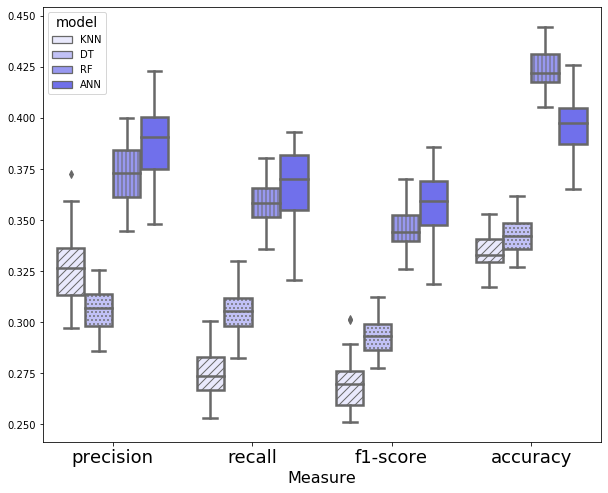

In [98]:
import seaborn as sns
from itertools import cycle
from pylab import rcParams

rcParams['figure.figsize'] = 10, 8
plt.rc('xtick', labelsize=18) 
plt.rc('axes', labelsize =16)
plt.rc('axes', titlesize=18)

sns_df = pd.melt(models_perf, id_vars="model")


ax = sns.boxplot(x="variable", y="value", hue="model",
                 data=sns_df, linewidth=2.5, palette=sns.light_palette("blue"))

hatches = cycle(['///', '...', '|||', ""])

for hatch, patch in zip(hatches, ax.artists):
    patch.set_hatch(hatch)

plt.xlabel("Measure")
plt.ylabel("")


plt.savefig('boxplot.png')

## Evaluating results of the upsampled ANN

In [23]:
unique_labs = np.unique(labels)
for i in range(len(unique_labs)):
    unique_labs[i] = unique_labs[i].replace("_p", "")
    unique_labs[i] = unique_labs[i].replace("_", "")

In [33]:
from sklearn.metrics import classification_report, roc_curve, auc

preds = model_wa.predict_classes(x_test)
report = classification_report(y_test, preds, output_dict=True)

report = pd.DataFrame(report).T.iloc[0:33]

report.support = np.round((report.support/y_test.shape[0]), decimals=3)

report["cancer_type"] = list(cancer_dict.values())
report["TCGA_project"] = unique_labs
report = report[["TCGA_project", 'cancer_type', 'precision', 'recall', 'f1-score', 'support']]
report.columns = ["TCGA_project", 'cancer_type', 'precision', 'recall', 'f1-score', 'prevalence']

report.precision = np.round((report.precision), decimals=2)
report.recall = np.round((report.recall), decimals=2)
report["f1-score"] = np.round((report["f1-score"]), decimals=2)

report = report.sort_values(by="f1-score", ascending=False).reset_index(drop=True)

report.to_csv("report.csv")

report


,TCGA_project,cancer_type,precision,recall,f1-score,prevalence
0,UVM,Uveal Melanoma,0.92,0.92,0.92,0.006
1,THCA,Thyroid carcinoma,0.87,0.68,0.77,0.045
2,LGG,Brain Lower Grade Glioma,0.77,0.73,0.75,0.047
3,PAAD,Pancreatic adenocarcinoma,0.78,0.60,0.68,0.019
4,UCEC,Uterine Corpus Endometrial Carcinoma,0.58,0.64,0.61,0.048
5,SKCM,Skin Cutaneous Melanoma,0.76,0.52,0.61,0.046
6,KIRC,Kidney renal clear cell carcinoma,0.61,0.54,0.57,0.034
7,LUAD,Lung adenocarcinoma,0.45,0.54,0.49,0.059
8,BRCA,Breast invasive carcinoma,0.55,0.42,0.48,0.100
9,TGCT,Testicular Germ Cell Tumors,0.48,0.43,0.46,0.017


In [151]:
np.mean(report.precision / report.prevalence), np.std(report.precision / report.prevalence) 

(23.136803826627386, 30.83141751987451)

In [154]:
report.precision / report.prevalence


0     153.333333
1      19.333333
2      16.382979
3      41.052632
4      12.083333
5      16.521739
6      17.941176
7       7.627119
8       5.500000
9      28.235294
10    110.000000
11      7.872340
12     11.000000
13     27.142857
14     14.666667
15      5.625000
16      8.857143
17      6.206897
18     46.000000
19      5.849057
20      6.590909
21     15.000000
22     21.111111
23      5.555556
24     20.000000
25      6.800000
26      8.333333
27     20.000000
28     62.500000
29     18.333333
30      4.146341
31      3.913043
32     10.000000
dtype: float64

In [34]:
tp_cr = 
np.where(preds[np.where(y_test == np.logical_or(5,23))] == np.logical_or(5,23)) 

SyntaxError: invalid syntax (<ipython-input-34-475c31917c34>, line 1)

In [156]:
len(np.where(preds[np.where(y_test == 5)] == 5)[0])/len(np.where(y_test == 5)[0])

0.5581395348837209

In [145]:
len(np.where(preds[np.where(y_test == np.logical_or(5,23))] == 5)[0])

2

In [29]:
sample_pos = np.where(np.logical_or(y_test == 5, y_test == 23))
test_pos = np.where(np.logical_or(preds == 5, preds == 23))

true_pos = np.where(np.logical_or(preds[sample_pos] == 5, preds[sample_pos] == 23))

recall_cr = len(true_pos[0])/len(sample_pos[0]) 
precison_cr = len(true_pos[0])/len(test_pos[0])

f1 = 2*(precison_cr * recall_cr)/(precison_cr + recall_cr)

precison_cr, recall_cr, f1

(0.5803571428571429, 0.5555555555555556, 0.5676855895196506)

In [142]:
len(np.where(preds[np.where(y_test == np.logical_or(5,100))] == np.logical_or(5,100))[0])

23

In [128]:
np.where(unique_labs == "COAD")[0][0], np.where(unique_labs == "READ")[0][0]

(5, 23)

In [178]:
y_test.shape

(2167,)

In [183]:
rand_pred = np.random.randint(0,33,2167)

print(classification_report(y_test, rand_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.03      0.03      0.03        75
           2       0.05      0.01      0.02       217
           3       0.03      0.04      0.03        50
           4       0.01      0.12      0.02         8
           5       0.07      0.06      0.06        86
           6       0.00      0.00      0.00         9
           7       0.02      0.03      0.02        38
           8       0.04      0.03      0.04       102
           9       0.08      0.05      0.06       105
          10       0.00      0.00      0.00        12
          11       0.04      0.04      0.04        74
          12       0.03      0.04      0.03        55
          13       0.00      0.00      0.00        31
          14       0.09      0.05      0.06       101
          15       0.07      0.05      0.06        77
          16       0.04      0.02      0.03       127
          17       0.05    

In [28]:
report.precision/report.prevalence

0     153.333333
1      19.333333
2      16.382979
3      41.052632
4      12.083333
5      16.521739
6      17.941176
7       7.627119
8       5.500000
9      28.235294
10    110.000000
11      7.872340
12     11.000000
13     27.142857
14     14.666667
15      5.625000
16      8.857143
17      6.206897
18     46.000000
19      5.849057
20      6.590909
21     15.000000
22     21.111111
23      5.555556
24     20.000000
25      6.800000
26      8.333333
27     20.000000
28     62.500000
29     18.333333
30      4.146341
31      3.913043
32     10.000000
dtype: float64

In [61]:
knn_performance = ["K Nearest Neighbors",0.34, 0.36, 0.39, 0.30, 0.34, 0.30, 0.33]
dt_performance = ["Decision Tree", 0.35, 0.31, 0.36, 0.32, 0.35, 0.30, 0.35]
rf_performance = ["Random Forest", 0.42, 0.36, 0.43, 0.36, 0.42, 0.35, 0.41]
ann_performance = ["Artificial Neural Network", 0.42, 0.39, 0.44, 0.33, 0.42, 0.33, 0.41]
ann_wa_performance = ["Artificial Neural Network", 0.41, 0.40, 0.45, 0.42, 0.41, 0.39, 0.41]

performance = [knn_performance, dt_performance, rf_performance, ann_wa_performance]
performance = pd.DataFrame(performance)
performance.columns = ["Model", "Accuracy", "Precision", 
                       "Weighted Precision", "Recall", 
                       "Weighted Recall", "F1-score", "weighted F1"]

performance[["Model", "Accuracy", "Precision", 
                       "Recall", "F1-score"]]

,Model,Accuracy,Precision,Recall,F1-score
0,K Nearest Neighbors,0.34,0.36,0.30,0.30
1,Decision Tree,0.35,0.31,0.32,0.30
2,Random Forest,0.42,0.36,0.36,0.35
3,Artificial Neural Network,0.41,0.40,0.42,0.39


In [21]:
df.shape

(10834, 536)

In [358]:
np.where(labels == "UVM_")

(array([10754, 10755, 10756, 10757, 10758, 10759, 10760, 10761, 10762,
        10763, 10764, 10765, 10766, 10767, 10768, 10769, 10770, 10771,
        10772, 10773, 10774, 10775, 10776, 10777, 10778, 10779, 10780,
        10781, 10782, 10783, 10784, 10785, 10786, 10787, 10788, 10789,
        10790, 10791, 10792, 10793, 10794, 10795, 10796, 10797, 10798,
        10799, 10800, 10801, 10802, 10803, 10804, 10805, 10806, 10807,
        10808, 10809, 10810, 10811, 10812, 10813, 10814, 10815, 10816,
        10817, 10818, 10819, 10820, 10821, 10822, 10823, 10824, 10825,
        10826, 10827, 10828, 10829, 10830, 10831, 10832, 10833],
       dtype=int64),)

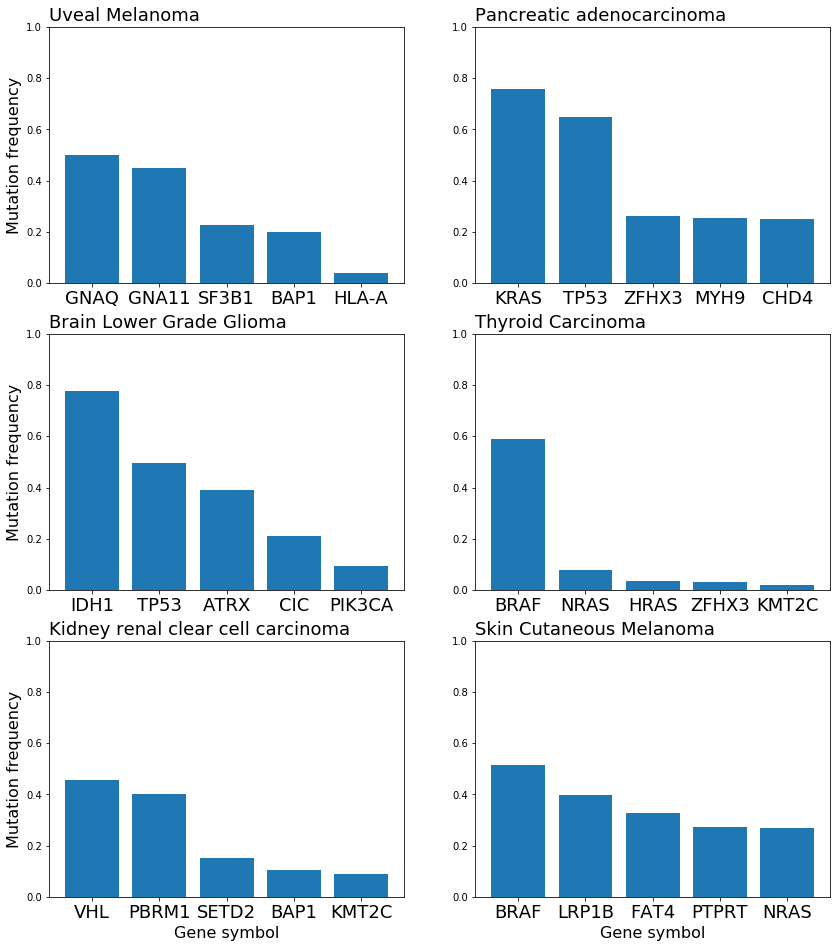

In [194]:
from pylab import rcParams

rcParams['figure.figsize'] = 14, 16
plt.rc('xtick', labelsize=18) 
plt.rc('axes', labelsize =16)
plt.rc('axes', titlesize=18)
test_df = pd.DataFrame(x_test)
test_df.columns = df.columns

#UVM

freq_test = test_df.iloc[np.where(preds == np.where(unique_labs == "UVM")[0][0])]
freq_test = pd.DataFrame(freq.sum()/freq.shape[0])

freq = df.iloc[np.where(labels == "UVM_")]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:5]




plt.subplot(3,2,1)
plt.bar(top_10.index , height = top_10[0])
plt.ylim((0, 1))
plt.ylabel("Mutation frequency")
plt.title("Uveal Melanoma", loc = "left")


freq = df.iloc[np.where(labels == "LGG_")]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:5]


plt.subplot(3,2,3)
plt.bar(top_10.index , height = top_10[0])
plt.ylabel("Mutation frequency")
plt.ylim((0, 1))
plt.title("Brain Lower Grade Glioma", loc = "left")


freq = df.iloc[np.where(labels == "PAAD")]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:5]


plt.subplot(3,2,2)
plt.bar(top_10.index , height = top_10[0])

plt.ylim((0, 1))
plt.title("Pancreatic adenocarcinoma", loc = "left")


freq = df.iloc[np.where(labels == "THCA")]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:5]


plt.subplot(3,2,4)
plt.bar(top_10.index , height = top_10[0])
plt.ylim((0, 1))
plt.title("Thyroid Carcinoma", loc = "left")



freq = df.iloc[np.where(labels == "KIRC")]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:5]


plt.subplot(3,2,5)
plt.bar(top_10.index , height = top_10[0])
plt.ylim((0, 1))
plt.ylabel("Mutation frequency")
plt.xlabel("Gene symbol")

plt.title("Kidney renal clear cell carcinoma", loc = "left")


freq = df.iloc[np.where(labels == "SKCM")]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:5]



plt.subplot(3,2,6)
plt.bar(top_10.index , height = top_10[0])
plt.ylim((0, 1))
plt.title("Skin Cutaneous Melanoma", loc = "left")
plt.xlabel("Gene symbol")

plt.savefig('barchart3.png')


## in test positive groups

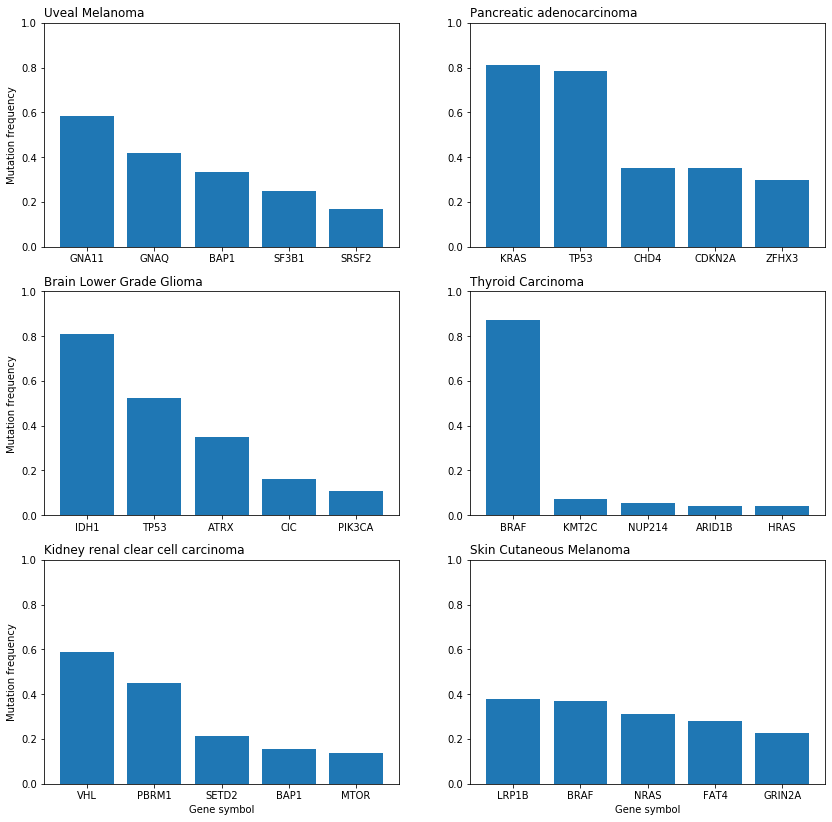

In [57]:
test_df = pd.DataFrame(x_test)
test_df.columns = df.columns


freq_test = test_df.iloc[np.where(preds == np.where(unique_labs == "UVM")[0][0])]
freq_test = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:5]


plt.subplot(3,2,1)
plt.bar(top_10.index , height = top_10[0])
plt.ylim((0, 1))
plt.ylabel("Mutation frequency")
plt.title("Uveal Melanoma", loc = "left")


freq = test_df.iloc[np.where(preds == np.where(unique_labs == "LGG")[0][0])]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:5]


plt.subplot(3,2,3)
plt.bar(top_10.index , height = top_10[0])
plt.ylabel("Mutation frequency")
plt.ylim((0, 1))
plt.title("Brain Lower Grade Glioma", loc = "left")


freq = test_df.iloc[np.where(preds == np.where(unique_labs == "PAAD")[0][0])]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:5]


plt.subplot(3,2,2)
plt.bar(top_10.index , height = top_10[0])

plt.ylim((0, 1))
plt.title("Pancreatic adenocarcinoma", loc = "left")



freq = test_df.iloc[np.where(preds == np.where(unique_labs == "THCA")[0][0])]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:5]


plt.subplot(3,2,4)
plt.bar(top_10.index , height = top_10[0])
plt.ylim((0, 1))
plt.title("Thyroid Carcinoma", loc = "left")



freq = test_df.iloc[np.where(preds == np.where(unique_labs == "KIRC")[0][0])]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:5]


plt.subplot(3,2,5)
plt.bar(top_10.index , height = top_10[0])
plt.ylim((0, 1))
plt.ylabel("Mutation frequency")
plt.xlabel("Gene symbol")
plt.title("Kidney renal clear cell carcinoma", loc = "left")


freq = test_df.iloc[np.where(preds == np.where(unique_labs == "SKCM")[0][0])]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:5]


plt.subplot(3,2,6)
plt.bar(top_10.index , height = top_10[0])
plt.ylim((0, 1))
plt.title("Skin Cutaneous Melanoma", loc = "left")
plt.xlabel("Gene symbol")

plt.savefig('barchart3.png')


Text(0.0, 1.0, 'Uveal Melanoma')

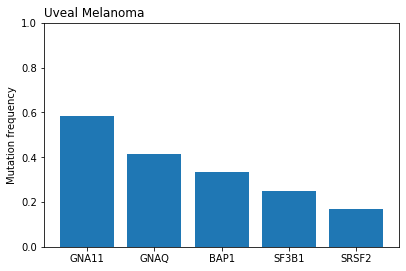

In [45]:
test_df = pd.DataFrame(x_test)
test_df.columns = df.columns


freq = test_df.iloc[np.where(preds == 32)]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:5]

plt.subplot(3,2,1)
plt.bar(top_10.index , height = top_10[0])
plt.ylim((0, 1))
plt.ylabel("Mutation frequency")
plt.title("Uveal Melanoma", loc = "left")

In [212]:
np.where(unique_labs == "BRCA"), np.where(unique_labs == "OV"), 

((array([2], dtype=int64),), (array([19], dtype=int64),))

Text(0.0, 1.0, 'Colon Adenocarcinoma')

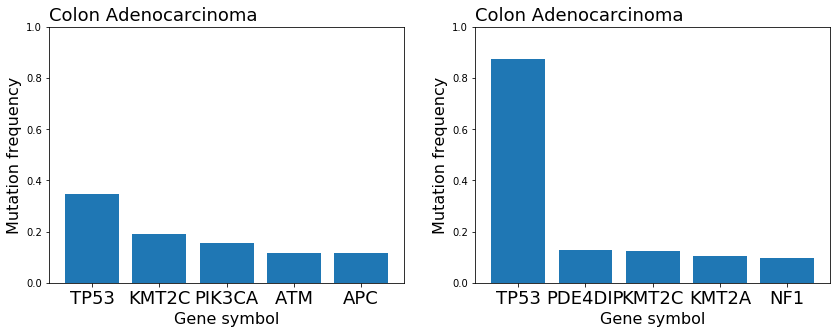

In [216]:


freq = df.iloc[np.where(np.logical_and(y_test == 2, preds == 19))]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:5]




plt.subplot(3,2,1)
plt.bar(top_10.index , height = top_10[0])
plt.ylim((0, 1))
plt.ylabel("Mutation frequency")
plt.xlabel("Gene symbol")
plt.title("Colon Adenocarcinoma", loc = "left")


freq = df.iloc[np.where(labels == "OV_p")]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:5]




plt.subplot(3,2,2)
plt.bar(top_10.index , height = top_10[0])
plt.ylim((0, 1))
plt.ylabel("Mutation frequency")
plt.xlabel("Gene symbol")
plt.title("Colon Adenocarcinoma", loc = "left")

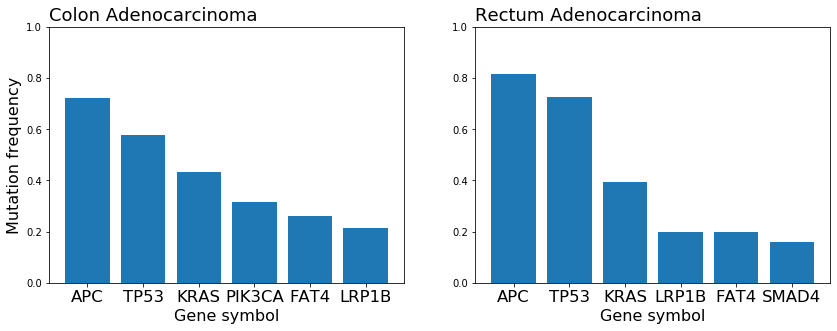

In [265]:
freq = df.iloc[np.where(labels == "COAD")]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:6]

rcParams['figure.figsize'] = 14, 16
plt.rc('xtick', labelsize=16.5) 


plt.subplot(3,2,1)
plt.bar(top_10.index , height = top_10[0])
plt.ylim((0, 1))
plt.ylabel("Mutation frequency")
plt.xlabel("Gene symbol")
plt.title("Colon Adenocarcinoma", loc = "left")


freq = df.iloc[np.where(labels == "READ")]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:6]


plt.subplot(3,2,2)
plt.bar(top_10.index , height = top_10[0])
plt.xlabel("Gene symbol")
plt.ylim((0, 1))
plt.title("Rectum Adenocarcinoma", loc = "left")


plt.savefig('barchart_cr.png')


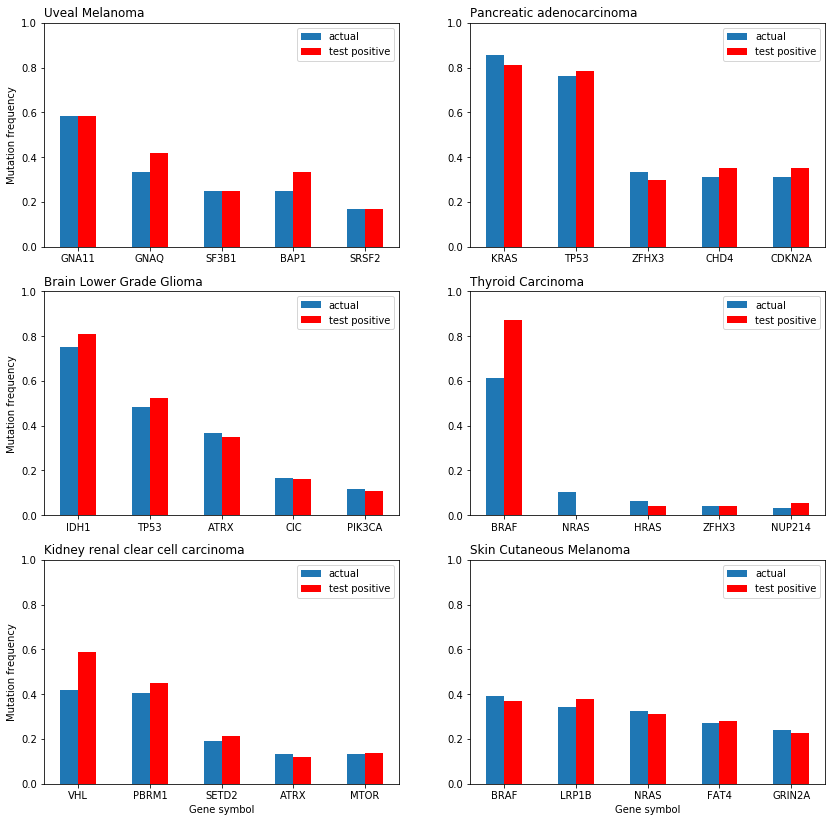

In [110]:
#UVM

freq_test = test_df.iloc[np.where(preds == np.where(unique_labs == "UVM")[0][0])]
freq_test = pd.DataFrame(freq_test.sum()/freq_test.shape[0])
freq_test.columns = ["test positive"]
freq = test_df.iloc[np.where(y_test == np.where(unique_labs == "UVM")[0][0])]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
freq.columns = ["target"]
top_10 = freq.sort_values(by = "target", ascending=False).iloc[0:5]
top_10 = top_10.merge(freq_test, how='left', left_index = True, right_index = True)

plt.subplot(3,2,1)
barWidth = 0.25
r1 = np.arange(5)
r2 = [x + barWidth for x in r1]
plt.bar(r1 , height = top_10["target"], label = "actual", width=barWidth)
plt.bar(r2 , height = top_10["test positive"], color = "red", label="test positive", width=barWidth)
plt.ylim((0, 1))
plt.ylabel("Mutation frequency")
plt.xticks([r + barWidth/2 for r in range(5)], top_10.index)
plt.title("Uveal Melanoma", loc = "left")
plt.legend()


#PAAD
freq_test = test_df.iloc[np.where(preds == np.where(unique_labs == "PAAD")[0][0])]
freq_test = pd.DataFrame(freq_test.sum()/freq_test.shape[0])
freq_test.columns = ["test positive"]
freq = test_df.iloc[np.where(y_test == np.where(unique_labs == "PAAD")[0][0])]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
freq.columns = ["target"]
top_10 = freq.sort_values(by = "target", ascending=False).iloc[0:5]
top_10 = top_10.merge(freq_test, how='left', left_index = True, right_index = True)

plt.subplot(3,2,2)
barWidth = 0.25
r1 = np.arange(5)
r2 = [x + barWidth for x in r1]
plt.bar(r1 , height = top_10["target"], label = "actual", width=barWidth)
plt.bar(r2 , height = top_10["test positive"], color = "red", label="test positive", width=barWidth)
plt.ylim((0, 1))
plt.xticks([r + barWidth/2 for r in range(5)], top_10.index)
plt.title("Pancreatic adenocarcinoma", loc = "left")
plt.legend()

#LGG

freq_test = test_df.iloc[np.where(preds == np.where(unique_labs == "LGG")[0][0])]
freq_test = pd.DataFrame(freq_test.sum()/freq_test.shape[0])
freq_test.columns = ["test positive"]
freq = test_df.iloc[np.where(y_test == np.where(unique_labs == "LGG")[0][0])]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
freq.columns = ["target"]
top_10 = freq.sort_values(by = "target", ascending=False).iloc[0:5]
top_10 = top_10.merge(freq_test, how='left', left_index = True, right_index = True)

plt.subplot(3,2,3)
barWidth = 0.25
r1 = np.arange(5)
r2 = [x + barWidth for x in r1]
plt.bar(r1 , height = top_10["target"], label = "actual", width=barWidth)
plt.bar(r2 , height = top_10["test positive"], color = "red", label="test positive", width=barWidth)
plt.ylim((0, 1))
plt.ylabel("Mutation frequency")
plt.xticks([r + barWidth/2 for r in range(5)], top_10.index)
plt.title("Brain Lower Grade Glioma", loc = "left")
plt.legend()


#THCA
freq_test = test_df.iloc[np.where(preds == np.where(unique_labs == "THCA")[0][0])]
freq_test = pd.DataFrame(freq_test.sum()/freq_test.shape[0])
freq_test.columns = ["test positive"]
freq = test_df.iloc[np.where(y_test == np.where(unique_labs == "THCA")[0][0])]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
freq.columns = ["target"]
top_10 = freq.sort_values(by = "target", ascending=False).iloc[0:5]
top_10 = top_10.merge(freq_test, how='left', left_index = True, right_index = True)

plt.subplot(3,2,4)
barWidth = 0.25
r1 = np.arange(5)
r2 = [x + barWidth for x in r1]
plt.bar(r1 , height = top_10["target"], label = "actual", width=barWidth)
plt.bar(r2 , height = top_10["test positive"], color = "red", label="test positive", width=barWidth)
plt.ylim((0, 1))
#plt.ylabel("Mutation frequency")
plt.xticks([r + barWidth/2 for r in range(5)], top_10.index)
plt.title("Thyroid Carcinoma", loc = "left")
plt.legend()


#KIRC

freq_test = test_df.iloc[np.where(preds == np.where(unique_labs == "KIRC")[0][0])]
freq_test = pd.DataFrame(freq_test.sum()/freq_test.shape[0])
freq_test.columns = ["test positive"]
freq = test_df.iloc[np.where(y_test == np.where(unique_labs == "KIRC")[0][0])]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
freq.columns = ["target"]
top_10 = freq.sort_values(by = "target", ascending=False).iloc[0:5]
top_10 = top_10.merge(freq_test, how='left', left_index = True, right_index = True)

plt.subplot(3,2,5)
barWidth = 0.25
r1 = np.arange(5)
r2 = [x + barWidth for x in r1]
plt.bar(r1 , height = top_10["target"], label = "actual", width=barWidth)
plt.bar(r2 , height = top_10["test positive"], color = "red", label="test positive", width=barWidth)
plt.ylim((0, 1))
plt.ylabel("Mutation frequency")
plt.xlabel("Gene symbol")
plt.xticks([r + barWidth/2 for r in range(5)], top_10.index)
plt.title("Kidney renal clear cell carcinoma", loc = "left")
plt.legend()


#SKCM
freq_test = test_df.iloc[np.where(preds == np.where(unique_labs == "SKCM")[0][0])]
freq_test = pd.DataFrame(freq_test.sum()/freq_test.shape[0])
freq_test.columns = ["test positive"]
freq = test_df.iloc[np.where(y_test == np.where(unique_labs == "SKCM")[0][0])]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
freq.columns = ["target"]
top_10 = freq.sort_values(by = "target", ascending=False).iloc[0:5]
top_10 = top_10.merge(freq_test, how='left', left_index = True, right_index = True)

plt.subplot(3,2,6)
barWidth = 0.25
r1 = np.arange(5)
r2 = [x + barWidth for x in r1]
plt.bar(r1 , height = top_10["target"], label = "actual", width=barWidth)
plt.bar(r2 , height = top_10["test positive"], color = "red", label="test positive", width=barWidth)
plt.ylim((0, 1))
#plt.ylabel("Mutation frequency")
plt.xlabel("Gene symbol")
plt.xticks([r + barWidth/2 for r in range(5)], top_10.index)
plt.title("Skin Cutaneous Melanoma", loc = "left")
plt.legend()


plt.savefig('barchart7.png')


In [72]:
freq_test.index

Index(['ABI1', 'ABL1', 'ABL2', 'ACKR3', 'ACSL3', 'ACVR1', 'ACVR2A', 'AFF1',
       'AFF3', 'AFF4',
       ...
       'XPO1', 'YWHAE', 'ZBTB16', 'ZFHX3', 'ZNF198', 'ZNF278', 'ZNF331',
       'ZNF384', 'ZNF521', 'ZRSR2'],
      dtype='object', length=536)

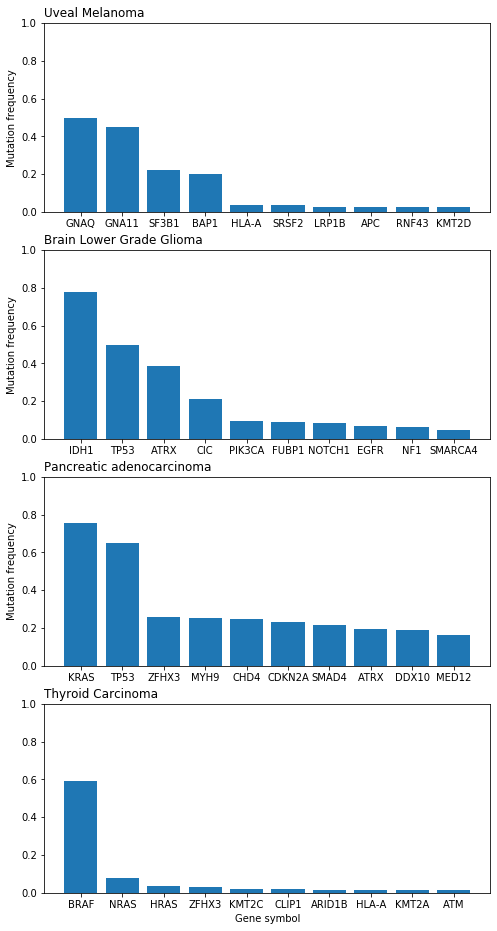

In [408]:
rcParams['figure.figsize'] = 8, 16

freq = df.iloc[np.where(labels == "UVM_")]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:10]


plt.subplot(4,1,1)
plt.bar(top_10.index , height = top_10[0])
plt.ylim((0, 1))
plt.ylabel("Mutation frequency")
plt.title("Uveal Melanoma", loc = "left")


freq = df.iloc[np.where(labels == "LGG_")]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:10]


plt.subplot(4,1,2)
plt.bar(top_10.index , height = top_10[0])
plt.ylim((0, 1))
plt.ylabel("Mutation frequency")
plt.title("Brain Lower Grade Glioma", loc = "left")


freq = df.iloc[np.where(labels == "PAAD")]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:10]


plt.subplot(4,1,3)
plt.bar(top_10.index , height = top_10[0])
plt.ylabel("Mutation frequency")
plt.ylim((0, 1))
plt.title("Pancreatic adenocarcinoma", loc = "left")


freq = df.iloc[np.where(labels == "THCA")]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:10]


plt.subplot(4,1,4)
plt.bar(top_10.index , height = top_10[0])
plt.ylim((0, 1))
plt.title("Thyroid Carcinoma", loc = "left")

plt.xlabel("Gene symbol")

plt.savefig('barchart2.png')


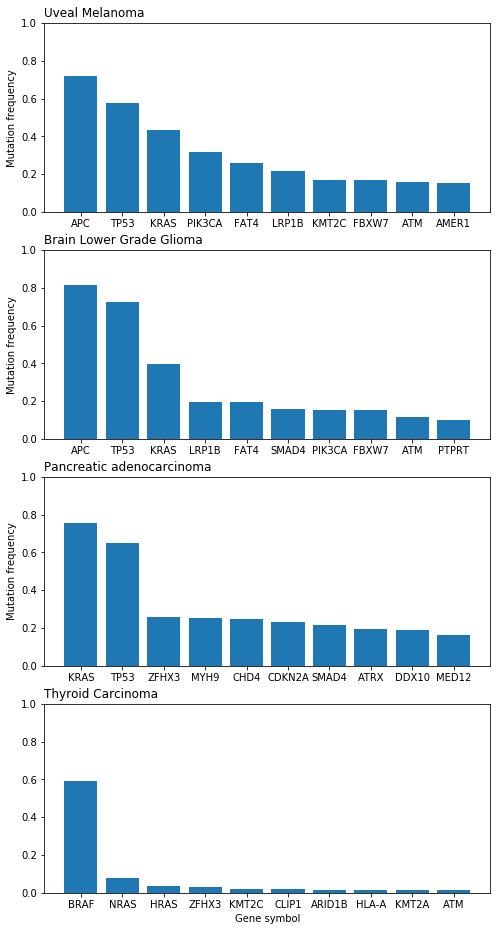

In [409]:
rcParams['figure.figsize'] = 8, 16

freq = df.iloc[np.where(labels == "COAD")]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:10]


plt.subplot(4,1,1)
plt.bar(top_10.index , height = top_10[0])
plt.ylim((0, 1))
plt.ylabel("Mutation frequency")
plt.title("Uveal Melanoma", loc = "left")


freq = df.iloc[np.where(labels == "READ")]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:10]


plt.subplot(4,1,2)
plt.bar(top_10.index , height = top_10[0])
plt.ylim((0, 1))
plt.ylabel("Mutation frequency")
plt.title("Brain Lower Grade Glioma", loc = "left")


freq = df.iloc[np.where(labels == "PAAD")]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:10]


plt.subplot(4,1,3)
plt.bar(top_10.index , height = top_10[0])
plt.ylabel("Mutation frequency")
plt.ylim((0, 1))
plt.title("Pancreatic adenocarcinoma", loc = "left")


freq = df.iloc[np.where(labels == "THCA")]
freq = pd.DataFrame(freq.sum()/freq.shape[0])
top_10 = freq.sort_values(by = 0, ascending=False).iloc[0:10]


plt.subplot(4,1,4)
plt.bar(top_10.index , height = top_10[0])
plt.ylim((0, 1))
plt.title("Thyroid Carcinoma", loc = "left")

plt.xlabel("Gene symbol")

plt.savefig('barchart4.png')


In [393]:
freq = df.iloc[np.where(labels == "LGG_")][[ "IDH1"]]
freq.sum()/freq.shape[0]*100

IDH1    77.861163
dtype: float64

In [237]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, probs, average="weighted", multi_class="ovo")

TypeError: roc_auc_score() got an unexpected keyword argument 'multi_class'

In [222]:
probs = model_wa.predict(x_test)

fpr = [] 
tpr = [] 
thresholds = []

for i in range(33):
    probs_test = probs[:,i]
    fpr_test, tpr_test, thresholds_test = roc_curve(np.where(y_test == i, 1, 0),probs_test)
    fpr.append(fpr_test)
    tpr.append(tpr_test)
    thresholds.append(thresholds_test)
    print(auc(fpr_test, tpr_test))

    
    
    

0.9408017249828481
0.7900446144040791
0.844531490015361
0.8140670760510156
0.963727420101899
0.9034425533341529
0.917052826691381
0.7514276532100566
0.8556687081612306
0.7950256339199113
0.9612142304717711
0.9042270890096977
0.8224259641873278
0.8515540050743022
0.9524143847104943
0.6867768595041321
0.8195248571869693
0.8319470692082157
0.9427509293680297
0.8255385084332453
0.943719887955182
0.9690579648405329
0.8687113314687686
0.8959012927389152
0.8088281626450201
0.9254562061622024
0.6998830294284839
0.9532736962314428
0.9728326806798119
0.9402240896358544
0.9214432864760058
0.9460361613351879
0.994044856921887


In [223]:
fpr = [] 
tpr = [] 
thresholds = []

for i in range(33):
    probs_test = probs[:,i]
    fpr_test, tpr_test, thresholds_test = roc_curve(np.where(y_test == i, 1, 0),probs_test)
    fpr.append(fpr_test)
    tpr.append(tpr_test)
    thresholds.append(thresholds_test)
    print(np.unique(labels)[i], " : ", np.round(auc(fpr_test, tpr_test) *100))


ACC_  :  94.0
BLCA  :  79.0
BRCA  :  84.0
CESC  :  81.0
CHOL  :  96.0
COAD  :  90.0
DLBC  :  92.0
ESCA  :  75.0
GBM_  :  86.0
HNSC  :  80.0
KICH  :  96.0
KIRC  :  90.0
KIRP  :  82.0
LAML  :  85.0
LGG_  :  95.0
LIHC  :  69.0
LUAD  :  82.0
LUSC  :  83.0
MESO  :  94.0
OV_p  :  83.0
PAAD  :  94.0
PCPG  :  97.0
PRAD  :  87.0
READ  :  90.0
SARC  :  81.0
SKCM  :  93.0
STAD  :  70.0
TGCT  :  95.0
THCA  :  97.0
THYM  :  94.0
UCEC  :  92.0
UCS_  :  95.0
UVM_  :  99.0


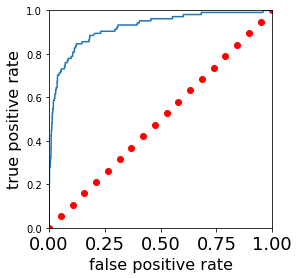

In [241]:
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 4, 4
n = 30

plt.plot(fpr[n], tpr[n])
plt.xlim([0,1])
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.scatter(np.linspace(0,1,20), np.linspace(0,1,20), c = "red")
plt.ylim([0,1])
plt.show()

In [260]:
sensitivity = 0.9
specificity = 0.9
prevalence = 0.03


ppv = (sensitivity * prevalence)/((sensitivity * prevalence) + (1 - specificity)*(1 - prevalence))

ppv
                                  

0.21774193548387102

In [253]:
np.mean(report.recall)

0.38727272727272727

In [31]:
np.unique(preds, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
       dtype=int64),
 array([ 27,  39, 203,  45,  21,  84,  19,  21,  95,  91,  31,  84,  24,
         21, 102,  49, 226,  73,  13, 120,  37,  14,  97,  31,  37,  62,
         87,  32,  91, 160, 100,  13,  18], dtype=int64))

In [102]:
report.support = np.round(report.support*100, decimals=2)

In [418]:
np.mean(report.precision)

0.37969696969696964

In [627]:

preds = model.predict_classes(x_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.29      0.21      0.24        19
           1       0.40      0.25      0.31        75
           2       0.52      0.49      0.51       217
           3       0.19      0.22      0.21        50
           4       0.22      0.50      0.31         8
           5       0.35      0.57      0.43        86
           6       0.71      0.56      0.63         9
           7       0.21      0.13      0.16        38
           8       0.37      0.52      0.43       102
           9       0.30      0.41      0.35       105
          10       0.11      0.42      0.17        12
          11       0.75      0.53      0.62        74
          12       0.11      0.05      0.07        55
          13       0.20      0.35      0.26        31
          14       0.74      0.67      0.70       101
          15       0.25      0.23      0.24        77
          16       0.51      0.38      0.43       127
          17       0.41    

In [ ]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, preds)

for i in range(33):
    for j in range(33):
        print(list(cancer_dict.values())[i], list(cancer_dict.values())[j], cm[i,j])

In [63]:
np.unique(y_test, return_counts = True)[1][23]

28

In [61]:
list(cancer_dict.values())[23]

'Rectum adenocarcinoma'

In [66]:
(cm[5,5] + cm[5,23] + cm[23,23] + cm[23,5]) / (76 + 28), cm[5,5]/76, cm[23,23]/28

(0.5480769230769231, 0.3026315789473684, 0.14285714285714285)

In [121]:
unique_labs = np.unique(labels)
for i in range(len(unique_labs)):
    unique_labs[i] = unique_labs[i].replace("_p", "")
    unique_labs[i] = unique_labs[i].replace("_", "")
    

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
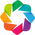

In [126]:
import pandas as pd
import holoviews as hv
from holoviews import opts, dim
from bokeh.sampledata.les_mis import data

links = pd.DataFrame(data['links'])


hv.extension('bokeh')
hv.output(size=200)


In [211]:
list_k = []

for i in range(33):
    for j in range(33):
        if i != j :
        #list_k.append([unique_labs[i],unique_labs[j],cm[i,j]])
            list_k.append([i,j,cm[i,j]])
mmm = pd.DataFrame(list_k) 
mmm.columns = links.columns


ppp = pd.DataFrame(unique_labs)
ppp.columns = ["name"]
ppp = hv.Dataset(ppp, 'index')

chord = hv.Chord((mmm, ppp)).select(value=(15, None))

chord.opts(
    opts.Chord(cmap='Category20', edge_cmap='Category20', edge_color=dim('source').str(), 
               labels='name', node_color=dim('index').str()))

:Chord   [source,target]   (value)

In [124]:
mmm

,0,1,2
0,0,1,0
1,0,2,0
2,0,3,0
3,0,4,0
4,0,5,1
...,...,...,...
1051,32,27,0
1052,32,28,1
1053,32,29,0
1054,32,30,0


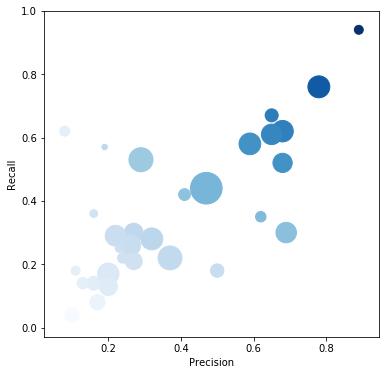

In [327]:
rcParams['figure.figsize'] = 6, 6
plt.scatter(report.precision, report.recall, s = report.frequency*10000, c = report["f1-score"], cmap = "Blues")
plt.xlabel("Precision")
plt.ylabel("Recall")

plt.savefig('scatter2.png')

In [308]:
np.corrcoef(report.precision, report.recall)

array([[1.        , 0.69757782],
       [0.69757782, 1.        ]])

## ANN + Weight Adjustment

In [21]:
y_test_d = pd.get_dummies(y_test)
model.evaluate(x_test, y_test_d, verbose=0)
preds = model.predict_classes(x_test)


preds = model.predict_classes(x_test)
print(classification_report(y_test, preds))


             precision    recall  f1-score   support

          0       0.21      0.16      0.18        19
          1       0.44      0.33      0.38        79
          2       0.42      0.54      0.47       218
          3       0.20      0.16      0.18        76
          4       0.33      0.33      0.33         3
          5       0.32      0.32      0.32        85
          6       0.43      0.50      0.46         6
          7       0.06      0.05      0.05        44
          8       0.38      0.34      0.36        93
          9       0.38      0.37      0.38       117
         10       0.00      0.00      0.00        12
         11       0.67      0.58      0.62        84
         12       0.19      0.11      0.14        62
         13       0.15      0.29      0.20        21
         14       0.75      0.81      0.78        99
         15       0.25      0.30      0.27        81
         16       0.48      0.45      0.47       132
         17       0.37      0.35      0.36   

In [35]:
np.unique(labels)[[32,28,25,20,14,11]]

array(['UVM_', 'THCA', 'SKCM', 'PAAD', 'LGG_', 'KIRC'], dtype=object)

In [291]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    accuracy = np.round(accuracy, 2)
    misclass = 1 - accuracy
    cm_a = cm.astype('float') / cm.sum(axis=0)[:, np.newaxis]
    cm_x = np.array([0] * 33)
    cm_x = cm_x.reshape(1,33)
    cm_a = np.append(cm_x , cm_a, axis = 0)
    
    cm = np.append(cm_x , cm, axis = 0)

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(20, 20))
    plt.imshow(cm_a, interpolation='nearest', cmap=cmap)
    #plt.title(title)
    #plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks , target_names[1:], rotation=45)
        plt.yticks(tick_marks, target_names)




    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j , i - 0.2, "{:0.0f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}; misclass={:0.2f}'.format(accuracy, misclass))
    plt.show()

In [260]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)

cm_x = np.array([0] * 33)
cm_x = cm_x.reshape(1,33)
cm_x = np.append(cm_x , cm, axis = 0)




array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 3,  0,  1, ...,  0,  0,  0],
       [ 0, 27,  4, ...,  3,  0,  0],
       ...,
       [ 0,  0,  8, ..., 59,  1,  0],
       [ 0,  0,  0, ...,  2,  3,  0],
       [ 0,  0,  0, ...,  0,  0, 16]], dtype=int64)

In [266]:
from pylab import rcParams
rcParams['figure.figsize'] = 24, 24

In [262]:
unique_labs_x = np.array("AAA")
unique_labs_x = np.append(unique_labs_x,unique_labs)

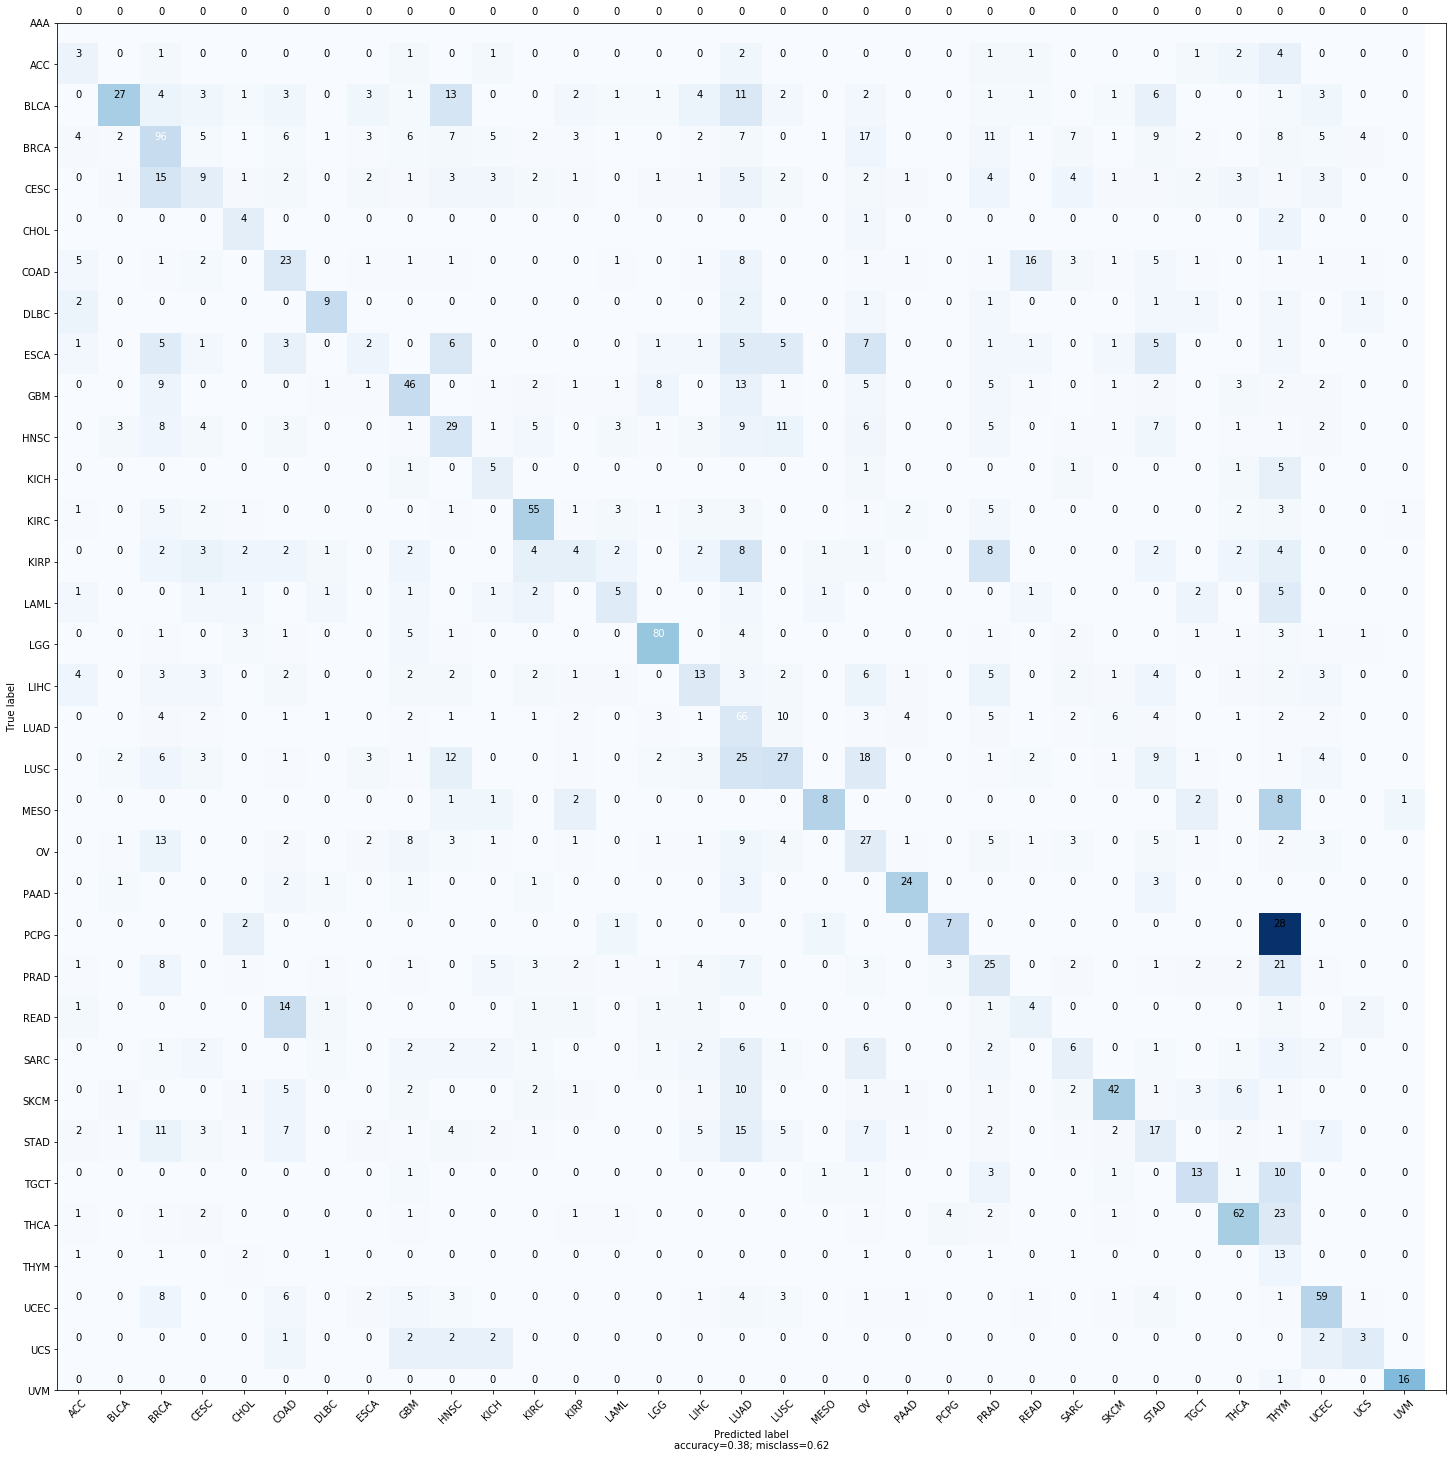

In [292]:
plot_confusion_matrix(cm,
                          target_names = unique_labs_x,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True)

## KNN

In [446]:
x_train, x_test, y_train, y_test = train_test_split(np.array(df), labels_num, test_size =0.2)

In [415]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

model_knn = KNeighborsClassifier(n_neighbors=6, metric="hamming")

# Train the model using the training sets
model_knn.fit(x_train,y_train)

preds_knn = model_knn.predict(x_test)
print(classification_report(y_test, preds_knn))

In [431]:
model_knn = KNeighborsClassifier(n_neighbors=5, metric="cosine")

model_knn.fit(x_train,y_train)

preds_knn = model_knn.predict(x_test)

print(classification_report(y_test, preds_knn))

              precision    recall  f1-score   support

           0       0.05      0.24      0.09        17
           1       0.39      0.24      0.30        90
           2       0.23      0.58      0.33       183
           3       0.07      0.05      0.06        57
           4       0.08      0.20      0.12         5
           5       0.38      0.34      0.36        89
           6       0.38      0.33      0.35         9
           7       0.08      0.04      0.06        46
           8       0.23      0.44      0.30       105
           9       0.26      0.36      0.30        91
          10       0.00      0.00      0.00        12
          11       0.69      0.42      0.52        84
          12       0.03      0.02      0.02        53
          13       0.27      0.12      0.16        26
          14       0.73      0.79      0.76       117
          15       0.08      0.05      0.06        88
          16       0.61      0.27      0.38       129
          17       0.69    

In [ ]:
print(classification_report(y_test, preds_knn))

In [84]:
np.round(np.unique(labels,return_counts=True)[1]/len(labels)*100,decimals=2)


array([ 5.75, 14.97,  4.21,  5.8 ,  2.54,  6.83,  5.72,  4.02,  5.17,
        8.64,  7.51,  6.28,  6.9 ,  2.15,  6.05,  7.47])

## Decision Tree


In [428]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
clf_preds = clf.predict(x_test)

print(classification_report(y_test, clf_preds))


In [429]:
clf_preds = clf.predict(x_test)



print(classification_report(y_test, clf_preds))


              precision    recall  f1-score   support

           0       0.03      0.06      0.04        17
           1       0.24      0.17      0.20        90
           2       0.33      0.44      0.38       183
           3       0.11      0.16      0.13        57
           4       0.08      0.20      0.11         5
           5       0.43      0.29      0.35        89
           6       0.09      0.11      0.10         9
           7       0.10      0.11      0.11        46
           8       0.35      0.23      0.28       105
           9       0.24      0.40      0.30        91
          10       0.12      0.08      0.10        12
          11       0.57      0.35      0.43        84
          12       0.06      0.06      0.06        53
          13       0.08      0.08      0.08        26
          14       0.71      0.78      0.74       117
          15       0.15      0.07      0.09        88
          16       0.38      0.32      0.35       129
          17       0.32    

In [447]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train);


rf_preds = rf.predict(x_test)



print(classification_report(y_test, rf_preds))

              precision    recall  f1-score   support

           0       0.11      0.20      0.14        15
           1       0.46      0.25      0.32        68
           2       0.42      0.57      0.48       204
           3       0.17      0.07      0.10        68
           4       0.00      0.00      0.00         9
           5       0.49      0.49      0.49        84
           6       0.67      0.17      0.27        12
           7       0.15      0.11      0.12        38
           8       0.43      0.38      0.41        94
           9       0.37      0.41      0.39       105
          10       0.20      0.17      0.18        18
          11       0.65      0.67      0.66        79
          12       0.11      0.08      0.09        62
          13       0.29      0.16      0.21        25
          14       0.77      0.82      0.80       120
          15       0.54      0.16      0.25        88
          16       0.57      0.39      0.46       135
          17       0.50    

In [448]:


rf_report = classification_report(y_test, rf_preds, output_dict=True)

rf_report = pd.DataFrame(rf_report).T.iloc[0:33]

rf_report.support = np.round((rf_report.support/y_test.shape[0]), decimals=3)

rf_report["cancer_type"] = list(cancer_dict.values())
rf_report["TCGA_project"] = unique_labs
rf_report = rf_report[["TCGA_project", 'cancer_type', 'precision', 'recall', 'f1-score', 'support']]
rf_report.columns = ["TCGA_project", 'cancer_type', 'precision', 'recall', 'f1-score', 'frequency']

rf_report.precision = np.round((rf_report.precision), decimals=2)
rf_report.recall = np.round((rf_report.recall), decimals=2)
rf_report["f1-score"] = np.round((rf_report["f1-score"]), decimals=2)

rf_report.sort_values(by="f1-score", ascending=False).reset_index(drop=True)

,TCGA_project,cancer_type,precision,recall,f1-score,frequency
0,UVM,Uveal Melanoma,0.68,1.00,0.81,0.006
1,LGG,Brain Lower Grade Glioma,0.77,0.82,0.80,0.055
2,PAAD,Pancreatic adenocarcinoma,0.74,0.70,0.72,0.017
3,KIRC,Kidney renal clear cell carcinoma,0.65,0.67,0.66,0.036
4,THCA,Thyroid carcinoma,0.63,0.70,0.66,0.046
5,SKCM,Skin Cutaneous Melanoma,0.69,0.56,0.62,0.045
6,UCEC,Uterine Corpus Endometrial Carcinoma,0.52,0.71,0.60,0.054
7,COAD,Colon adenocarcinoma,0.49,0.49,0.49,0.039
8,BRCA,Breast invasive carcinoma,0.42,0.57,0.48,0.094
9,LUAD,Lung adenocarcinoma,0.57,0.39,0.46,0.062
